In [17]:
#Import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
data = pd.read_csv("/content/Iris.csv")
data_copy = data.copy()

data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
#Transform object values

le = LabelEncoder()
data["species"] = le.fit_transform(data["Species"])

data.drop(columns = ["Id", "Species"], inplace = True)
print(data["species"].unique())

[0 1 2]


In [22]:
print(data.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
species          0
dtype: int64


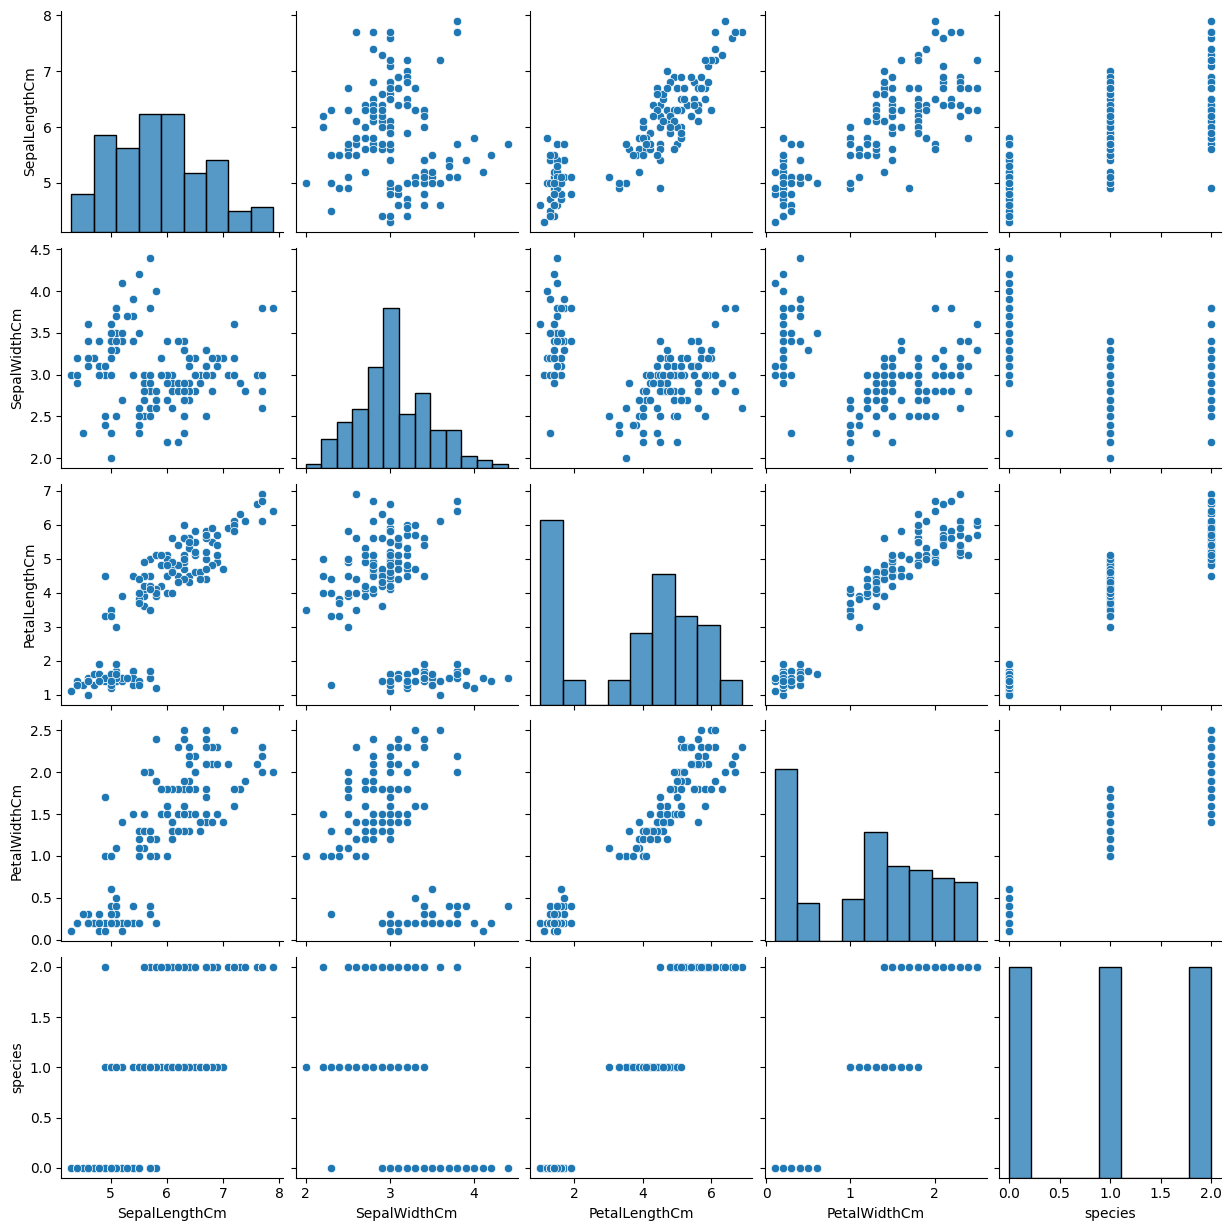

In [23]:
sns.pairplot(data)
plt.show()

In [28]:
#Split data into train and test

y = data["species"]
x = data.drop(columns = 'species', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
#Standardize

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
#Model

model = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs',random_state = 42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [32]:
#Metrics before tuning

acs = accuracy_score(y_test, pred)
print(f"Accuracy score: {acs}")

print("Classification report: \n", classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print("Confusion matrix \n", cm)

Accuracy score: 1.0
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


it is 100%, overfitting problem...


In [39]:
import warnings
warnings.filterwarnings('ignore')

cross_v = cross_val_score(model, x, y, cv = 5)
print(round(cross_v.mean() * 100, 2))

97.33


In [40]:
#Hyperparameter tuning
params = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'saga'],  # Solvers to use
    'max_iter': [100, 200, 500],  # Max iterations
    'multi_class': ['ovr', 'multinomial']  # Strategy for multiclass classification
}

grid = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)

print("Best Hyperparameters from GridSearchCV:", grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters from GridSearchCV: {'C': 10, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


In [41]:
#New Model

model = LogisticRegression(C = 10, max_iter=100, multi_class='multinomial', solver='lbfgs',random_state = 42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


Accuracy score: 100.0%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



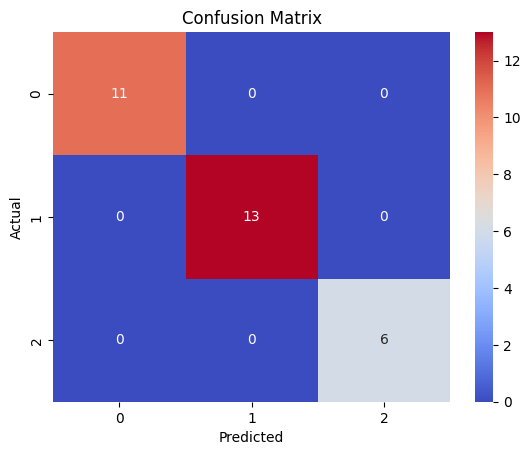

In [43]:
#Metrics after tuning

acs = accuracy_score(y_test, pred)
print(f"Accuracy score: {round(acs * 100, 2)}%")

print("Classification report: \n", classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, fmt = "d", cmap = "coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [45]:
cross_val = cross_val_score(model, x, y, cv = 5)
print(round(cross_val.mean() * 100, 2))

97.33


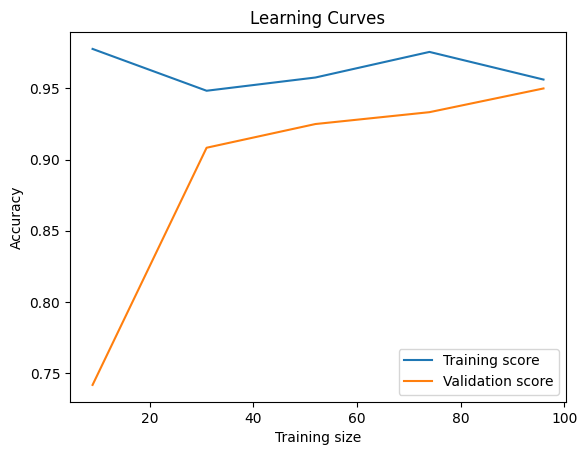

In [46]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs', random_state=42),
    x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()
